In [2]:
import numpy as np
import os
import argparse
from tqdm import tqdm
import matplotlib.pyplot as plt
import cv2

import torch.nn as nn
import torch
import torch.nn.functional as F

from torchinfo import summary

In [3]:
result = np.load('asd.npy').squeeze(0)
result.shape

(3, 512, 512)

In [4]:
result

array([[[0.3259761 , 0.7664355 , 0.99596524, ..., 1.0643346 ,
         0.97846764, 1.0031034 ],
        [0.5692154 , 0.3235987 , 1.0333567 , ..., 1.0464486 ,
         1.1045822 , 1.0493823 ],
        [0.84472066, 0.13237695, 0.9721592 , ..., 0.9983215 ,
         1.0043631 , 1.0033727 ],
        ...,
        [1.0593014 , 1.0327103 , 1.0217946 , ..., 1.0025375 ,
         1.0166329 , 0.99163574],
        [1.0807854 , 1.0190216 , 1.0194569 , ..., 1.0338639 ,
         1.0486175 , 1.0015035 ],
        [1.1035128 , 0.9831752 , 1.045489  , ..., 1.0364605 ,
         1.0927455 , 1.0234879 ]],

       [[0.26333442, 0.7437926 , 1.0784614 , ..., 0.9964748 ,
         1.1206797 , 1.2141727 ],
        [0.6386931 , 0.4737749 , 1.1480584 , ..., 1.0009639 ,
         1.1060482 , 1.0643775 ],
        [0.9305505 , 0.35537708, 1.0664806 , ..., 1.0265151 ,
         1.0556415 , 1.0170486 ],
        ...,
        [1.0220315 , 1.0789651 , 1.0579349 , ..., 1.024904  ,
         1.0682002 , 0.9845957 ],
        [0.9

In [5]:
a = np.rollaxis(result, 0, 3)
a.shape

(512, 512, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


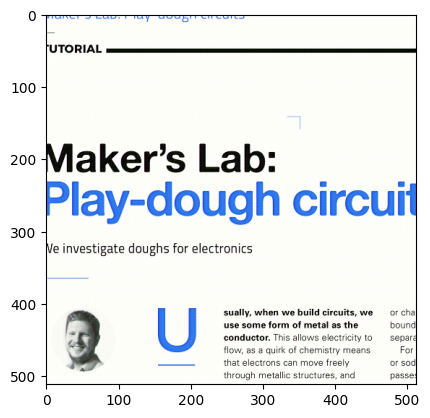

In [6]:
plt.imshow(a)
plt.show()

In [7]:
b = cv2.normalize(a, None, 255, 0, cv2.NORM_MINMAX, cv2.CV_8U)

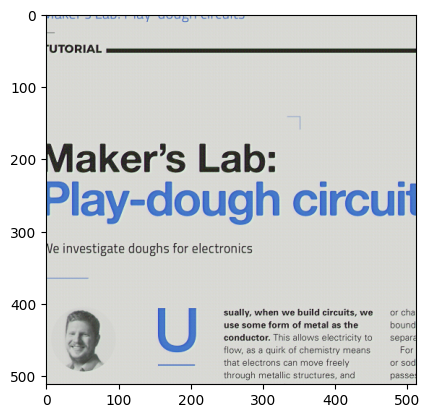

In [8]:
plt.imshow(b)
plt.show()

In [9]:
yuv = cv2.cvtColor(a, cv2.COLOR_RGB2YUV)

In [13]:
yuv.shape

(512, 512, 3)

In [16]:
from basicsr.metrics.metric_util import reorder_image, to_y_channel

In [27]:
c = to_y_channel(b)

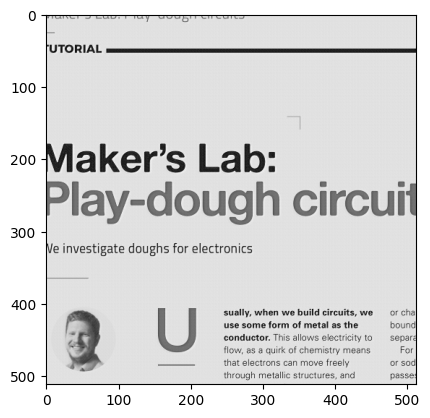

In [31]:
plt.imshow(c, cmap='gray')
plt.show()

In [32]:
from basicsr.utils.matlab_functions import bgr2ycbcr

In [33]:
d = bgr2ycbcr(a)

In [37]:
cv2.imshow("asd", d)
cv2.waitKey(0)

48

In [38]:
dd = cv2.imread(d, cv2.IMREAD_YUV)

AttributeError: module 'cv2' has no attribute 'IMREAD_YUV'

: 